In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import HTML, display
from IPython.display import IFrame
InteractiveShell.ast_node_interactivity = 'all'
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

import os
import pandas as pd

wd = '/Users/zxs/data/kaggle_flights'
os.chdir(wd)

flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [3]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [28]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [52]:
origins = flights.merge(airports, how = 'left', left_on = 'ORIGIN_AIRPORT', right_on = 'IATA_CODE')

In [53]:
origins.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [70]:
origins1 = origins.iloc[:, 31:38]

In [71]:
origins1.columns = ['ORIGIN_{}'.format(i) for i in origins1.columns]

In [75]:
destinations = flights.merge(airports, how = 'left', left_on = 'DESTINATION_AIRPORT', right_on = 'IATA_CODE')
destinations1 = destinations.iloc[:, 31:38]
destinations1.columns = ['DESTINATION_{}'.format(i) for i in destinations1.columns]

In [76]:
flights1 = pd.concat([origins1, destinations1], axis = 1)
flights1.head()

,ORIGIN_IATA_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_IATA_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


<Figure size 1800x1800 with 0 Axes>

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


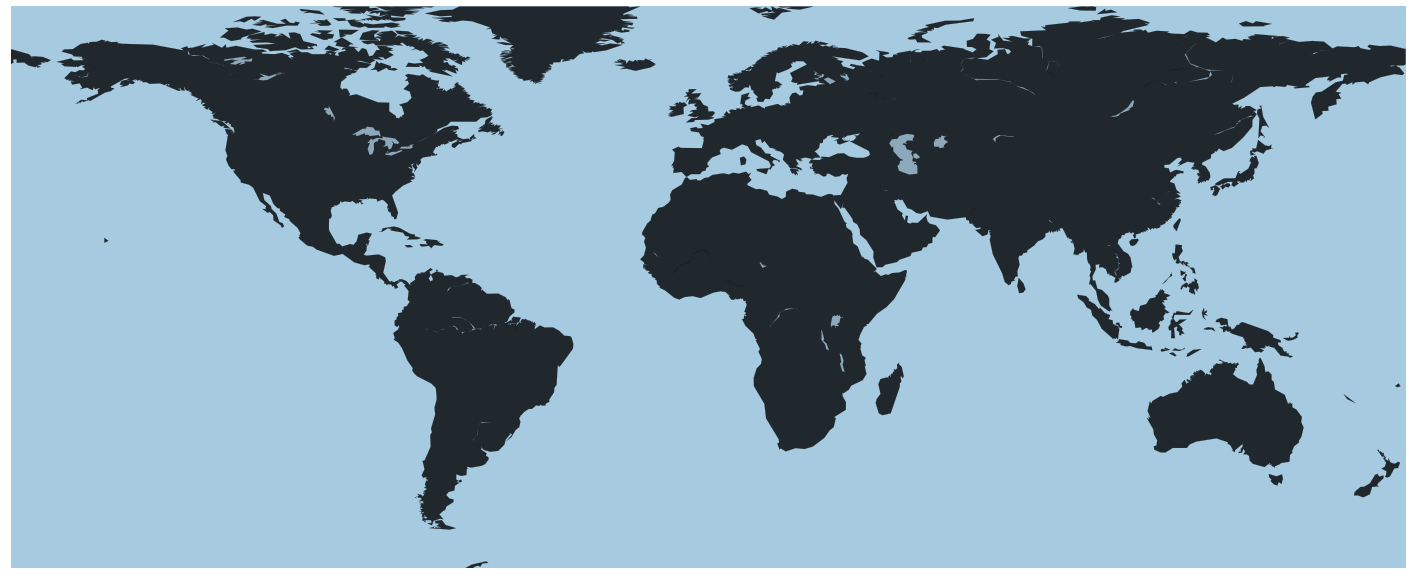

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Make the background map
plt.figure(figsize = (25, 25))
m = Basemap(llcrnrlon = -180, llcrnrlat = -65, urcrnrlon = 180, urcrnrlat = 80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth = 0)
m.fillcontinents(color = 'black', alpha = 0.8)
m.drawcoastlines(linewidth = 0.1, color = 'black')
plt.show()

In [88]:
counts = flights1.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).agg('size').reset_index().rename({0: 'NUM_FLIGHTS'}, axis = 1)

In [90]:
counts

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,NUM_FLIGHTS
0,Aberdeen Regional Airport,Minneapolis-Saint Paul International Airport,671
1,Abilene Regional Airport,Dallas/Fort Worth International Airport,2329
2,Abraham Lincoln Capital Airport,Chicago O'Hare International Airport,998
3,Abraham Lincoln Capital Airport,Dallas/Fort Worth International Airport,589
4,Adak Airport,Ted Stevens Anchorage International Airport,96
...,...,...,...
4688,Yeager Airport,Myrtle Beach International Airport,64
4689,Yellowstone Regional Airport,Chicago O'Hare International Airport,9
4690,Yellowstone Regional Airport,Denver International Airport,316
4691,Yellowstone Regional Airport,Salt Lake City International Airport,340


In [93]:
flights1.head()

,ORIGIN_IATA_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_IATA_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


<Figure size 1800x1800 with 0 Axes>

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


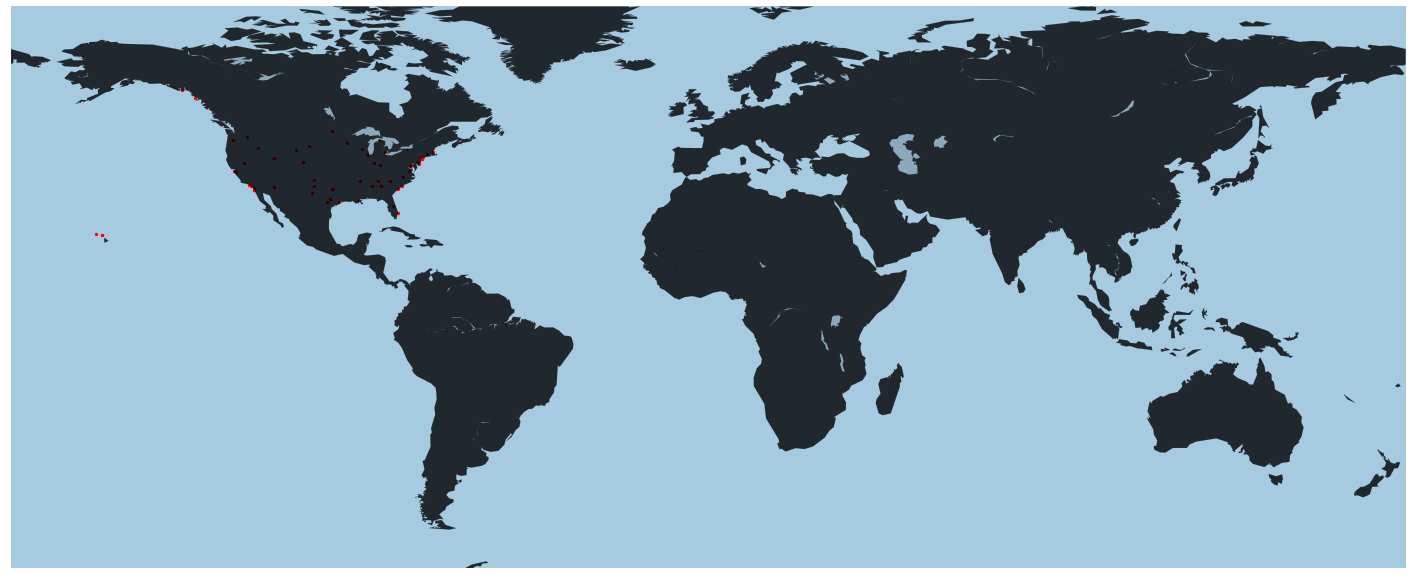

In [108]:
# Plot origins
sample = flights1[['ORIGIN_LONGITUDE', 'ORIGIN_LATITUDE', 'DESTINATION_LONGITUDE', 'DESTINATION_LATITUDE']].drop_duplicates().sample(n = 100)

plt.figure(figsize = (25, 25))
m = Basemap(llcrnrlon = -180, llcrnrlat = -65, urcrnrlon = 180, urcrnrlat = 80)

x, y = m(sample['ORIGIN_LONGITUDE'], sample['ORIGIN_LATITUDE'])

m.drawmapboundary(fill_color='#A6CAE0', linewidth = 0)
m.fillcontinents(color = 'black', alpha = 0.8)
m.drawcoastlines(linewidth = 0.1, color = 'black')

m.scatter(x, y, c = 'red', s = 5)

plt.show()

<Figure size 1800x1800 with 0 Axes>

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'Map of World Airport Locations')

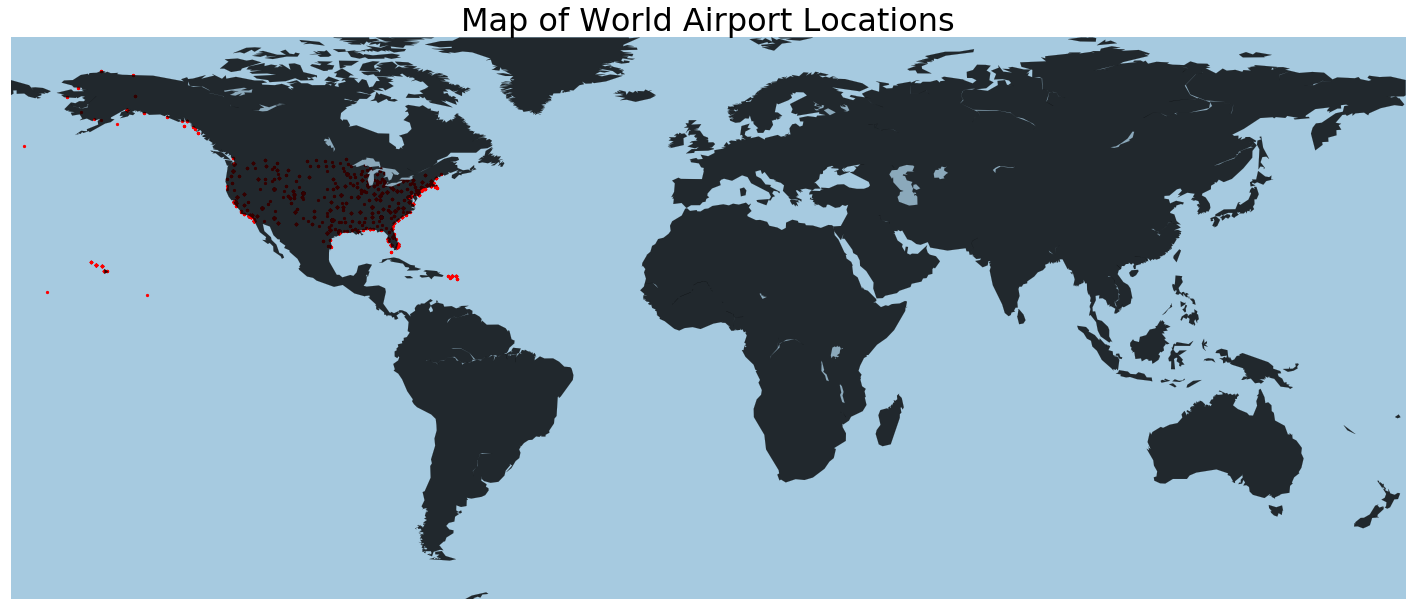

In [111]:
# Plot origins
flights2 = flights1[['ORIGIN_LONGITUDE', 'ORIGIN_LATITUDE', 'DESTINATION_LONGITUDE', 'DESTINATION_LATITUDE']].drop_duplicates()

plt.figure(figsize = (25, 25))
m = Basemap(llcrnrlon = -180, llcrnrlat = -65, urcrnrlon = 180, urcrnrlat = 80)

x, y = m(flights2['ORIGIN_LONGITUDE'], flights2['ORIGIN_LATITUDE'])

m.drawmapboundary(fill_color='#A6CAE0', linewidth = 0)
m.fillcontinents(color = 'black', alpha = 0.8)
m.drawcoastlines(linewidth = 0.1, color = 'black')

m.scatter(x, y, c = 'red', s = 5)

plt.title('Map of World Airport Locations', fontsize = 32)
plt.show()

In [112]:
len(flights2)

4694

<Figure size 1800x1800 with 0 Axes>

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Map of US Airport Locations')

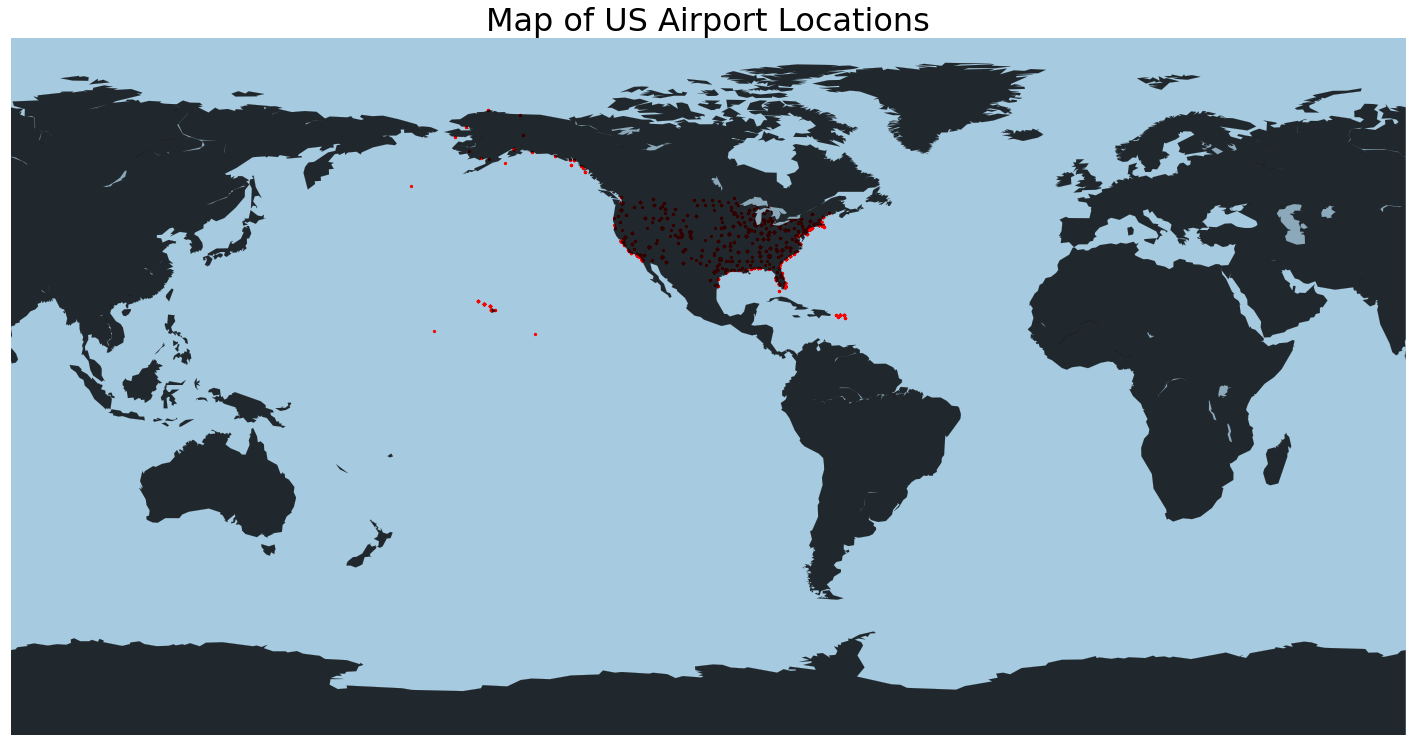

In [114]:
# Plot origins
plt.figure(figsize = (25, 25))
m = Basemap(lat_0 = 45, lon_0 = -100)

x, y = m(flights2['ORIGIN_LONGITUDE'], flights2['ORIGIN_LATITUDE'])

m.drawmapboundary(fill_color = '#A6CAE0', linewidth = 0)
m.fillcontinents(color = 'black', alpha = 0.8)
m.drawcoastlines(linewidth = 0.1, color = 'black')

m.scatter(x, y, c = 'red', s = 5)

plt.title('Map of US Airport Locations', fontsize = 32)
plt.show()

In [115]:
test = flights2.sample(n = 1)

<Figure size 1800x1800 with 0 Axes>

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


IndexError: tuple index out of range

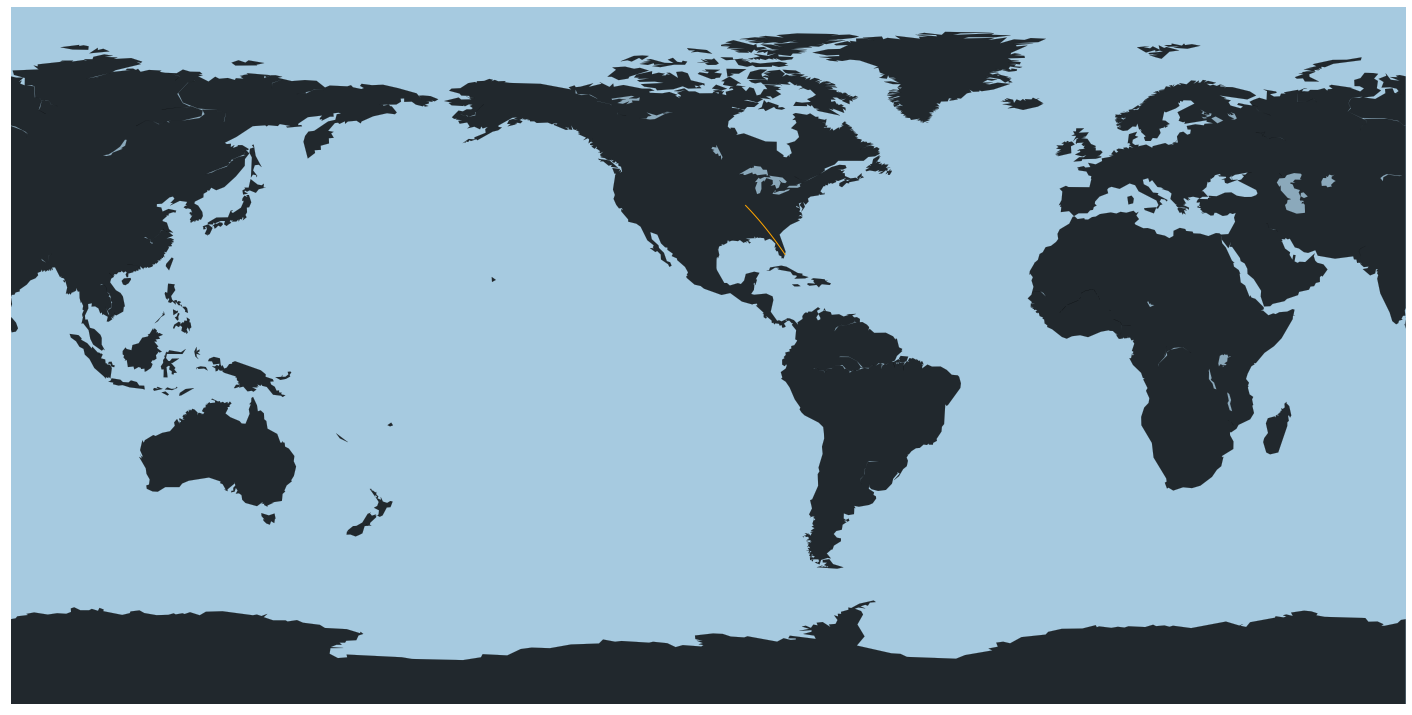

In [120]:
plt.figure(figsize = (25, 25))
m = Basemap(lat_0 = 45, lon_0 = -100)

x, y = m(test['ORIGIN_LONGITUDE'], test['ORIGIN_LATITUDE'])

m.drawmapboundary(fill_color = '#A6CAE0', linewidth = 0)
m.fillcontinents(color = 'black', alpha = 0.8)
m.drawcoastlines(linewidth = 0.1, color = 'black')

startlong, startlat, stoplong, stoplat = float(test['ORIGIN_LONGITUDE']), float(test['ORIGIN_LATITUDE']), float(test['DESTINATION_LONGITUDE']), float(test['DESTINATION_LATITUDE'])

# Add a connection between new york and London
m.drawgreatcircle(startlong, startlat, stoplong, stoplat, linewidth = 1, color = 'orange')

plt.title('Flight Path for {} to {}'.format(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']), fontsize = 32)
plt.show()

In [123]:
flights2.isnull().sum()

ORIGIN_LONGITUDE         12
ORIGIN_LATITUDE          12
DESTINATION_LONGITUDE    12
DESTINATION_LATITUDE     12
dtype: int64

In [124]:
flights3 = flights2.dropna()

<Figure size 1800x1800 with 0 Axes>

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 1.0, 'Flight Paths')

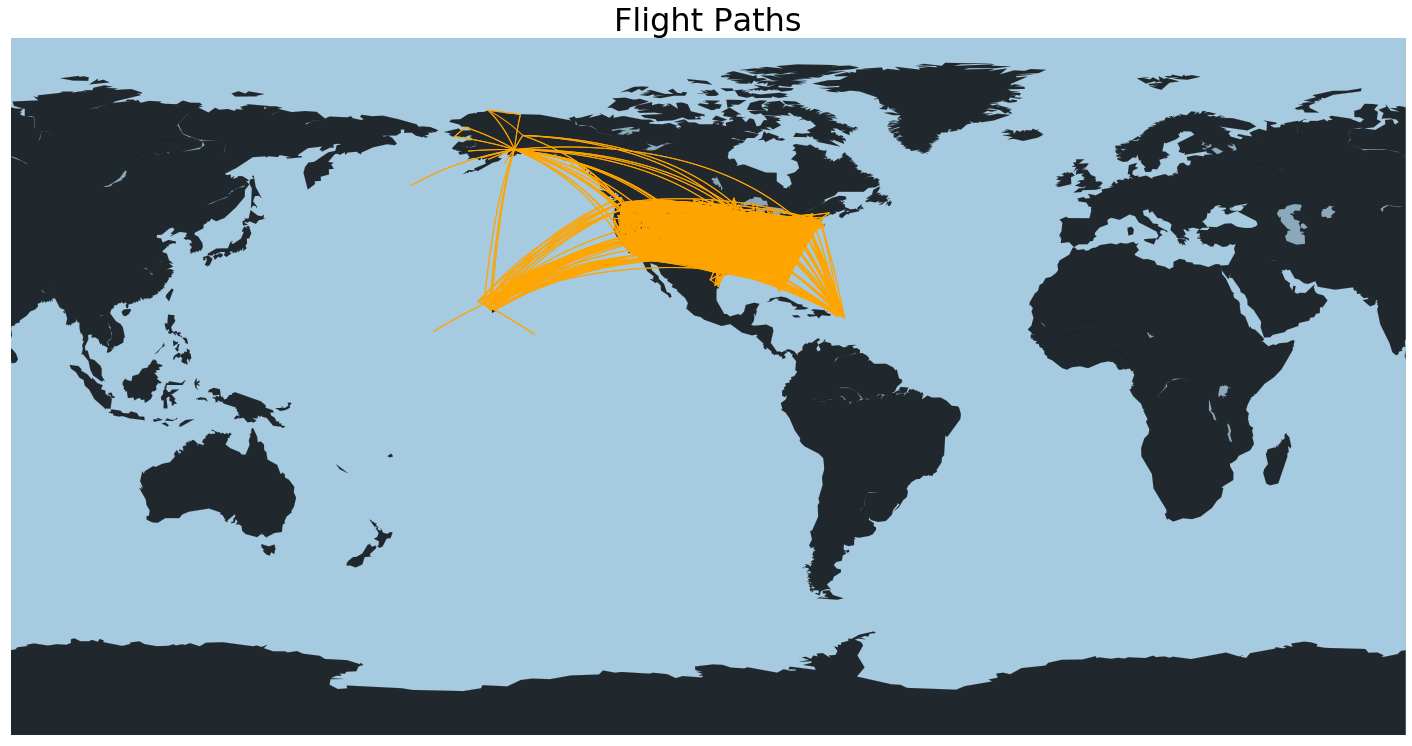

In [131]:
plt.figure(figsize = (25, 25))
m = Basemap(lat_0 = 45, lon_0 = -100)

x, y = m(flights3['ORIGIN_LONGITUDE'], flights3['ORIGIN_LATITUDE'])
x1, y1 = m(flights3['DESTINATION_LONGITUDE'], flights3['DESTINATION_LATITUDE'])

m.drawmapboundary(fill_color = '#A6CAE0', linewidth = 0)
m.fillcontinents(color = 'black', alpha = 0.8)
m.drawcoastlines(linewidth = 0.1, color = 'black')

paths = pd.DataFrame({'x': x,
                      'y': y,
                      'x1': x1,
                      'y1': y1})

for idx, row in paths.iterrows():
    
    try:
        
        startlong, startlat, stoplong, stoplat = float(row['x']), float(row['y']), float(row['x1']), float(row['y1'])
    
        m.drawgreatcircle(startlong, startlat, stoplong, stoplat, linewidth = 1, color = 'orange')

    except:
        
        print(row)
        
plt.title('Flight Paths', fontsize = 32)
plt.show()